In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [135]:
df = pd.read_csv('/content/sample_data/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [136]:
country = df[['Country']]
country

,Country
0,Afghanistan
1,Afghanistan
2,Afghanistan
3,Afghanistan
4,Afghanistan
...,...
2933,Zimbabwe
2934,Zimbabwe
2935,Zimbabwe
2936,Zimbabwe


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [117]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [118]:
df = df.drop(columns=['Year'])

In [119]:
def renameColumns(kolom=df.columns):
    dict_name = {}
    for i in kolom:
      newName = i.strip().lower().replace(' ','_')
      dict_name[i] = newName
    return dict_name
new = renameColumns()
df = df.rename(columns=new)

In [120]:
imputer = SimpleImputer(strategy="median")
data_numeric = df.select_dtypes(include=[np.number])
imputer.fit(data_numeric)

SimpleImputer(strategy='median')

In [121]:
data = imputer.transform(data_numeric)
df_numeric = pd.DataFrame(data, columns=data_numeric.columns,index=data_numeric.index)

In [122]:
status = pd.get_dummies(df['status'])

In [123]:
df=pd.concat([df_numeric,status], axis=1)

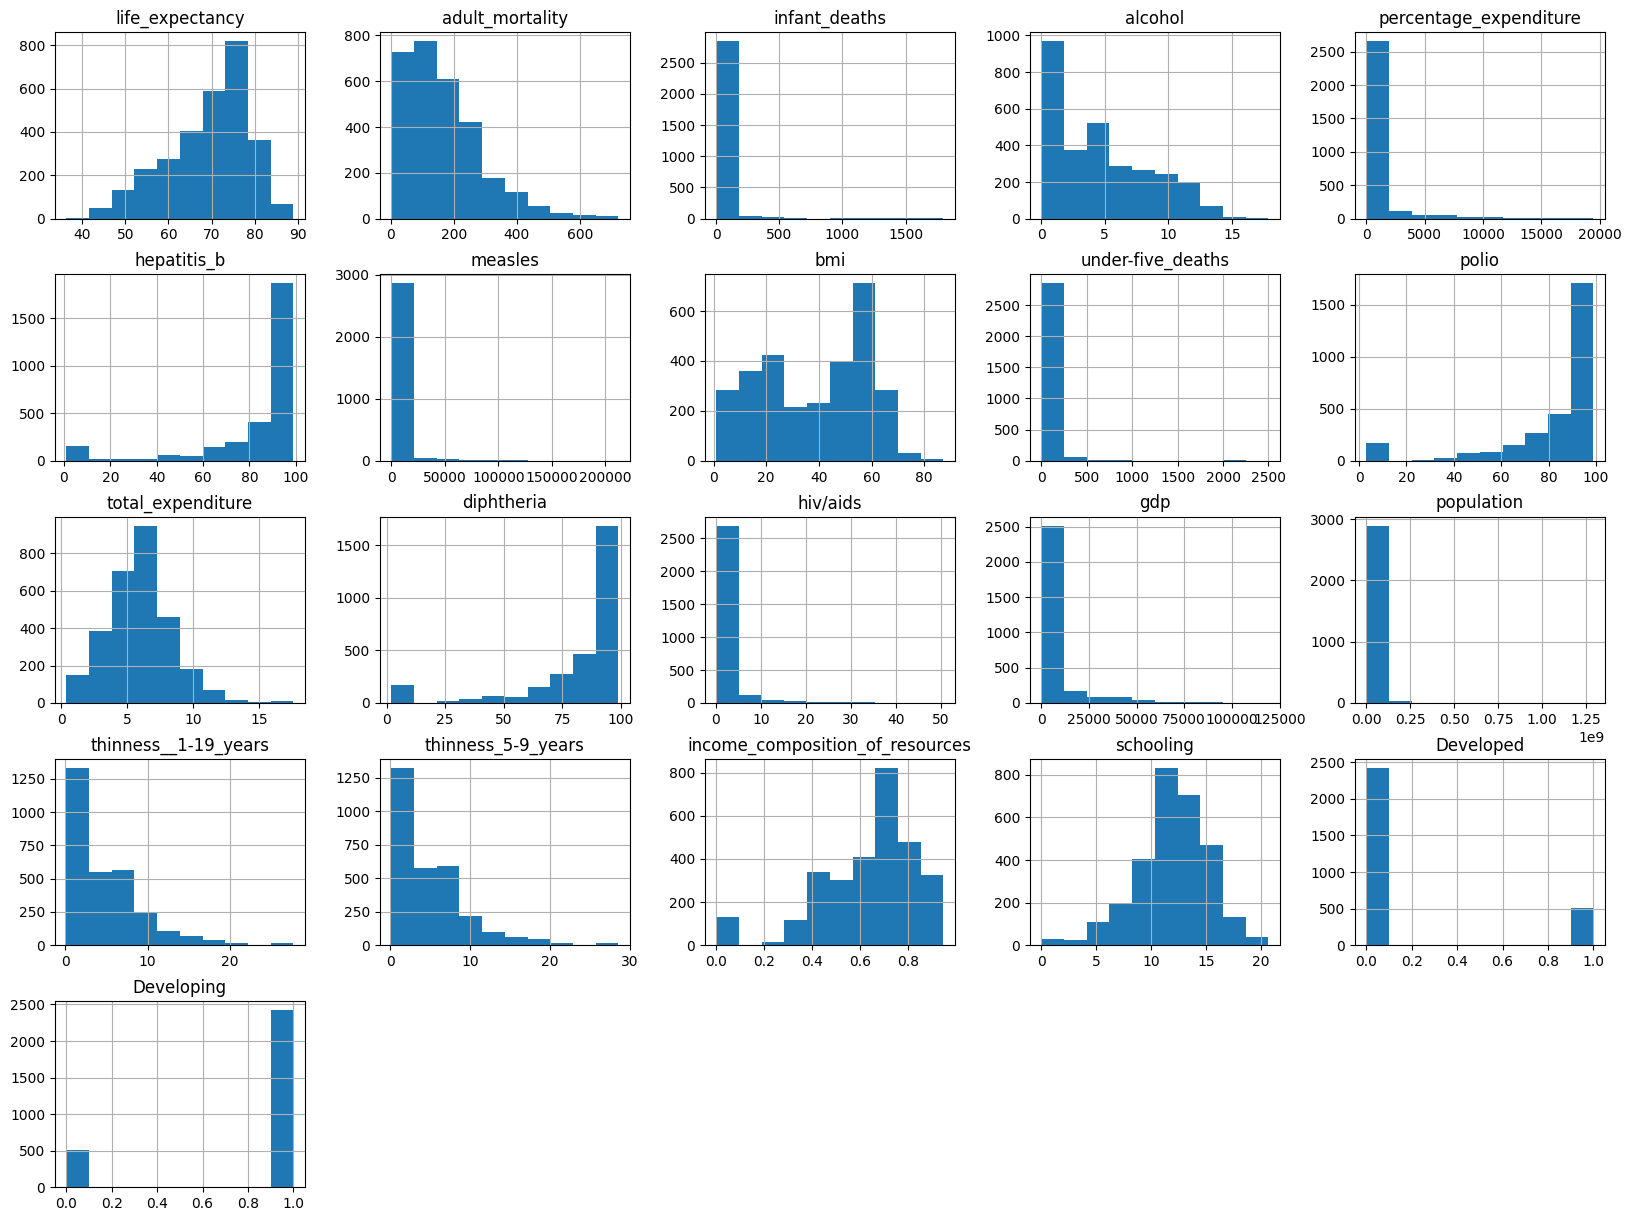

In [124]:
df.hist(figsize=(20,15))

plt.show()

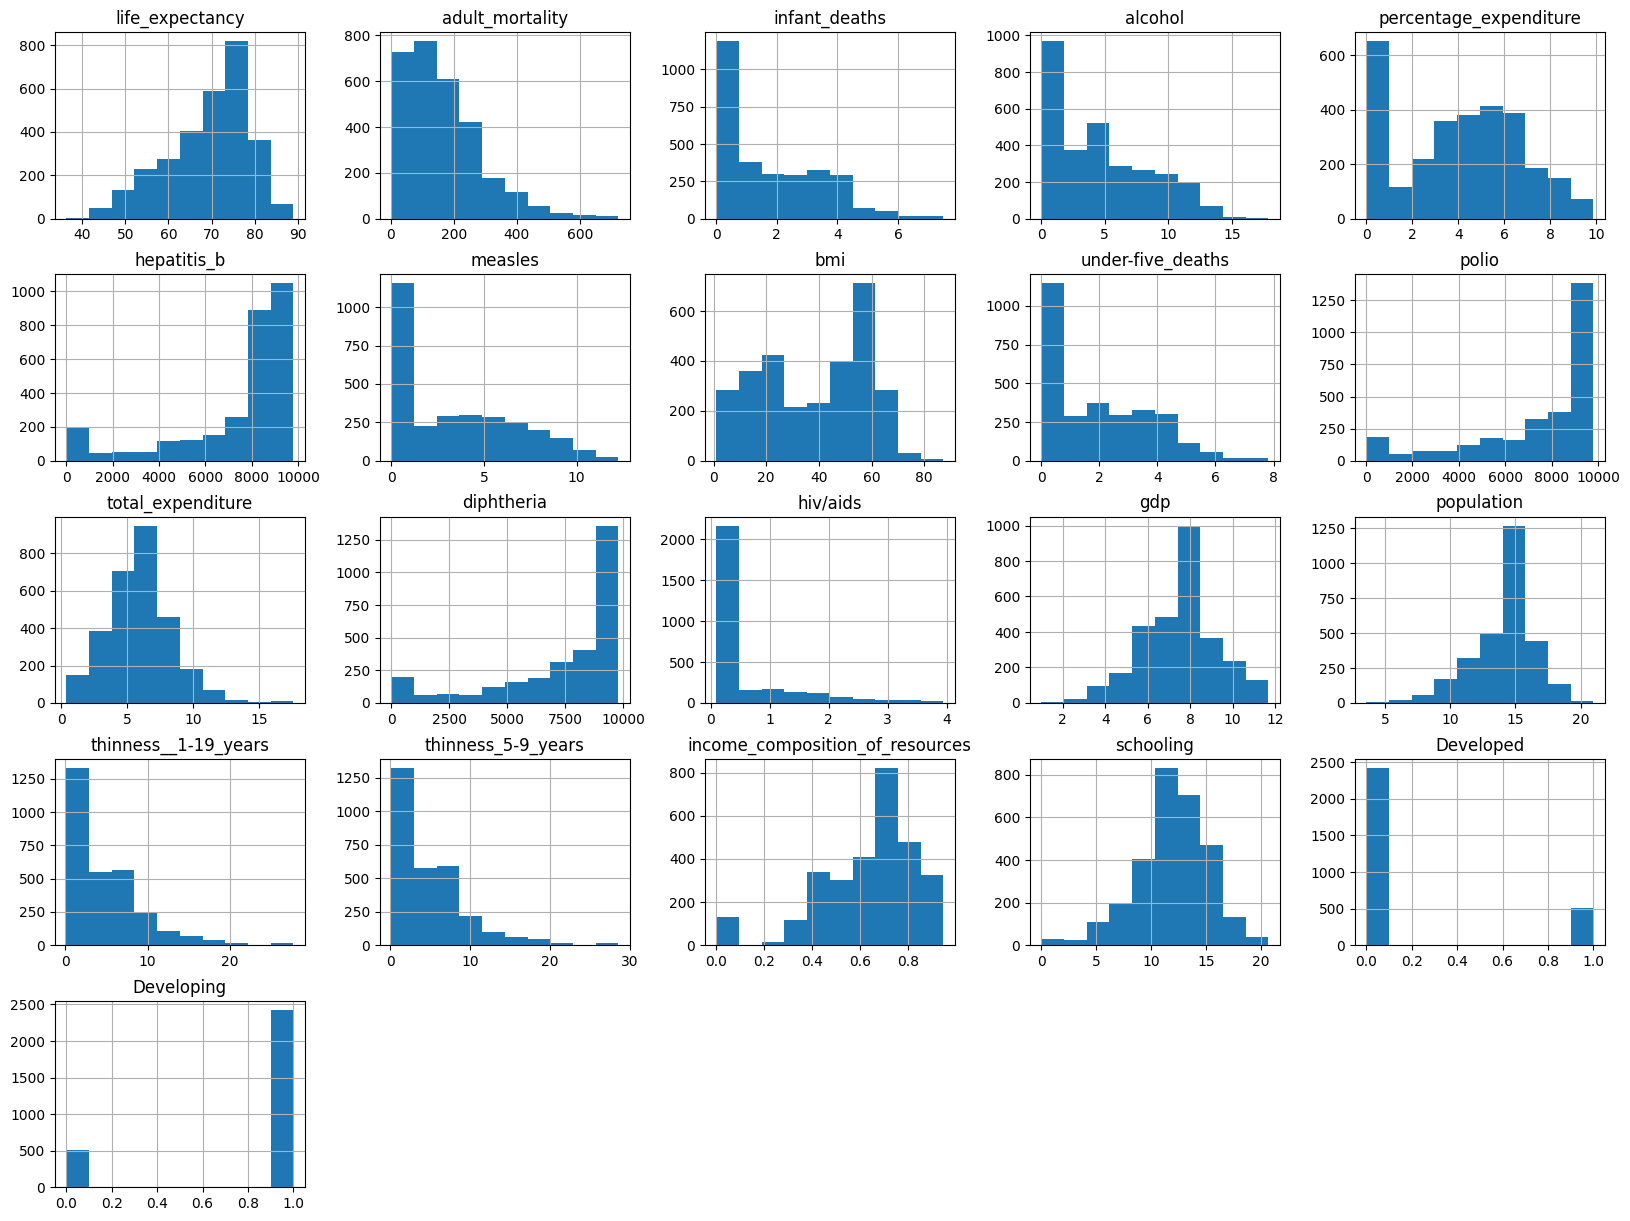

In [125]:
df['population'] = np.log(df['population']+1)
df['gdp'] = np.log(df['gdp']+1)
df['infant_deaths'] = np.log(df['infant_deaths']+1)
df['percentage_expenditure'] = np.log(df['percentage_expenditure']+1)
df['measles'] = np.log(df['measles']+1)
df['under-five_deaths'] = np.log(df['under-five_deaths']+1)
df['hiv/aids'] = np.log(df['hiv/aids']+1)
df['hepatitis_b'] = np.square(df['hepatitis_b'])
df['polio'] = np.square(df['polio'])
df['diphtheria'] = np.square(df['diphtheria'])

df.hist(figsize=(20,15))

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

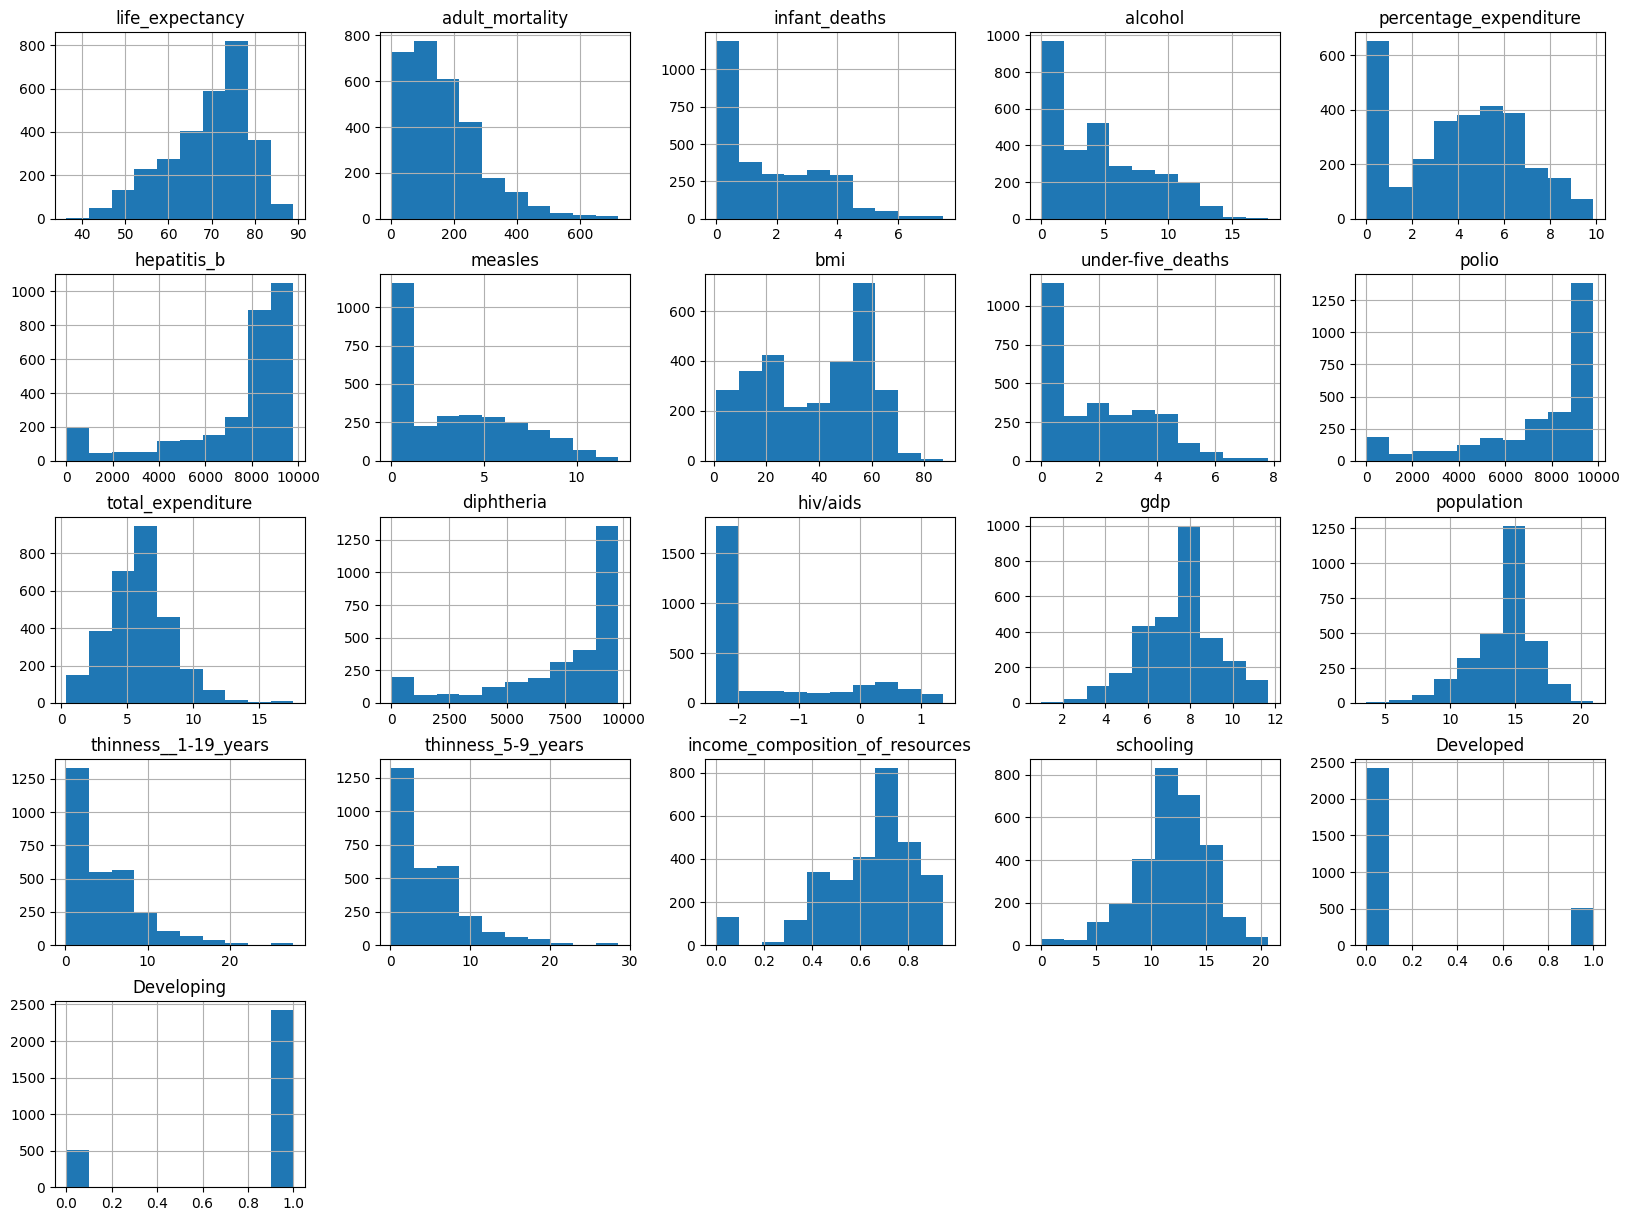

In [126]:
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_hiv = log_transformer.transform(df[['hiv/aids']])
df['hiv/aids'] = log_hiv

df.hist(figsize=(20,15))
plt.show

<Axes: >

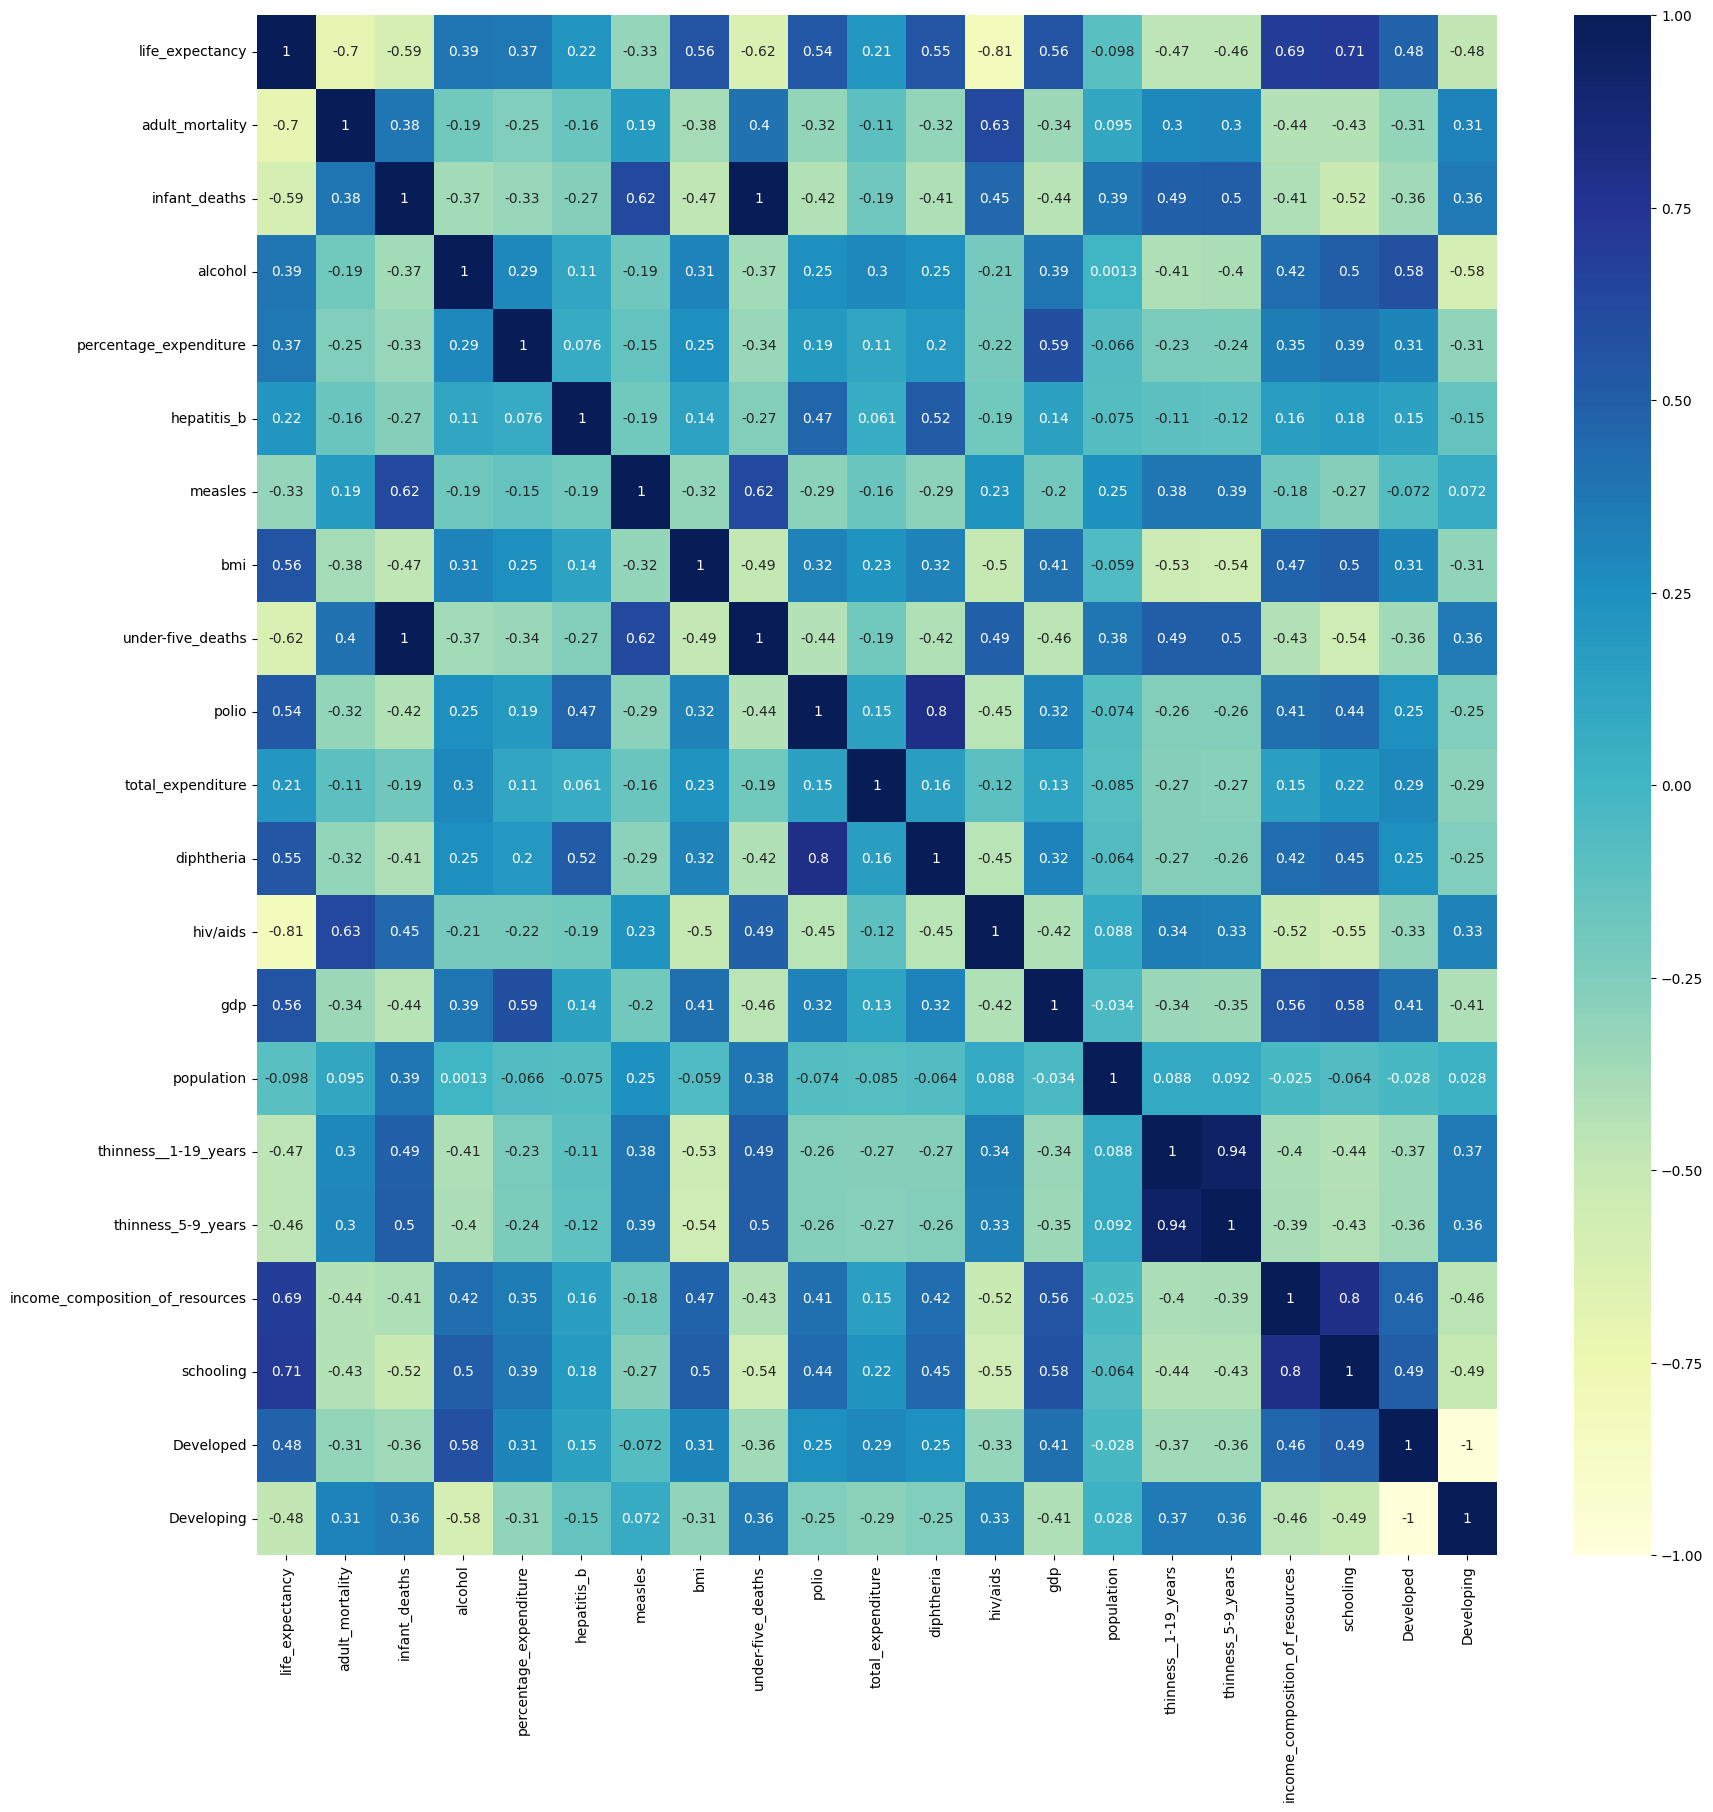

In [127]:
correlation = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation, annot=True, cmap="YlGnBu")

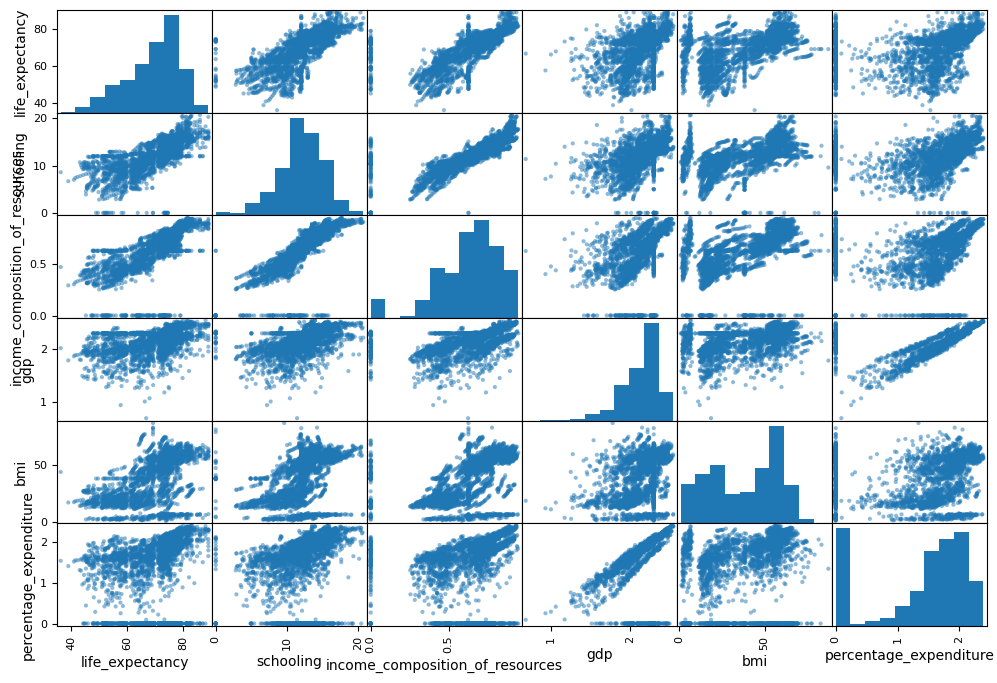

In [128]:
most_corr_attribute = ['life_expectancy','schooling','income_composition_of_resources', 'gdp', 'bmi', 'percentage_expenditure']

scatter_matrix(df_non_null[most_corr_attribute], figsize=(12,8))

plt.show()

In [129]:
df

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,...,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,Developed,Developing
0,65.0,263.0,4.143135,0.01,4.280542,4225.0,7.051856,19.1,4.430817,36.0,...,4225.0,-2.350619,6.372055,17.334091,17.2,17.3,0.479,10.1,0,1
1,59.9,271.0,4.174387,0.01,4.311116,3844.0,6.200509,18.6,4.465908,3364.0,...,3844.0,-2.350619,6.419501,12.699497,17.5,17.5,0.476,10.0,0,1
2,59.9,268.0,4.204693,0.01,4.307023,4096.0,6.066108,18.1,4.499810,3844.0,...,4096.0,-2.350619,6.450067,17.272826,17.7,17.7,0.470,9.9,0,1
3,59.5,272.0,4.248495,0.01,4.371777,4489.0,7.933080,17.6,4.543295,4489.0,...,4489.0,-2.350619,6.508708,15.123021,17.9,18.0,0.463,9.8,0,1
4,59.2,275.0,4.276666,0.01,2.091507,4624.0,8.011023,17.2,4.584967,4624.0,...,4624.0,-2.350619,4.167242,14.906964,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,44.3,723.0,3.332205,4.36,0.000000,4624.0,3.465736,27.1,3.761200,4489.0,...,4225.0,1.265215,6.121103,16.363197,9.4,9.4,0.407,9.2,0,1
2934,44.5,715.0,3.295837,4.06,0.000000,49.0,6.906755,26.7,3.737670,49.0,...,4624.0,1.289139,6.118870,16.351894,9.8,9.9,0.418,9.5,0,1
2935,44.8,73.0,3.258097,4.43,0.000000,5329.0,5.720312,26.3,3.713572,5329.0,...,5041.0,1.310677,4.066431,11.740268,1.2,1.3,0.427,10.0,0,1
2936,45.3,686.0,3.258097,1.72,0.000000,5776.0,6.272877,25.9,3.688879,5776.0,...,5625.0,1.325355,6.309168,16.330475,1.6,1.7,0.427,9.8,0,1


In [130]:
atribute = df.drop(columns='life_expectancy')
label = df[['life_expectancy']]

scaler = StandardScaler()
atribute = scaler.fit_transform(atribute)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(atribute,label, random_state=42, test_size=0.2)

In [140]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [143]:
predict = lin_reg.predict(X_test)
lin_rmse = mean_squared_error(y_test,predict,squared=False)
lin_rmse

3.536052446715532

In [145]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_test,y_test)

DecisionTreeRegressor(random_state=42)

In [146]:
tree_predict = tree_reg.predict(X_test)
tree_rmse = mean_squared_error(y_test,tree_predict,squared=False)
tree_rmse

0.0

In [148]:
tree_rmses = -cross_val_score(tree_reg,atribute,label, scoring='neg_root_mean_squared_error',cv=10)
pd.Series(tree_rmses).describe()

count    10.000000
mean      3.851411
std       0.365914
min       3.287789
25%       3.601597
50%       3.869813
75%       4.094488
max       4.355742
dtype: float64